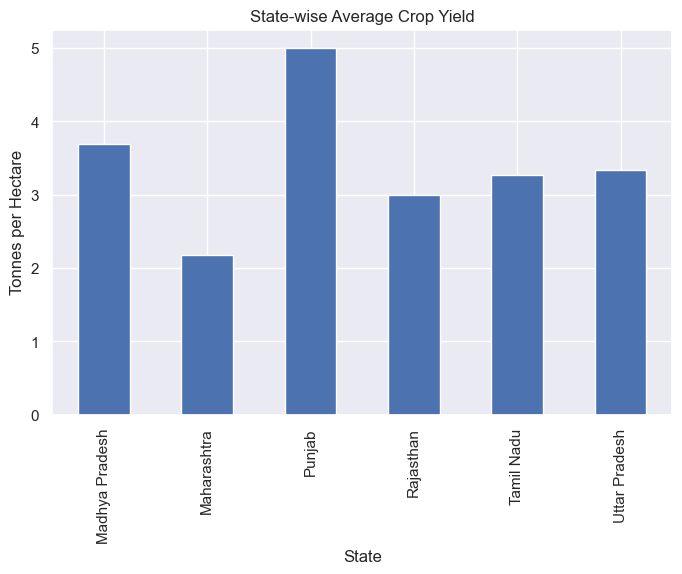

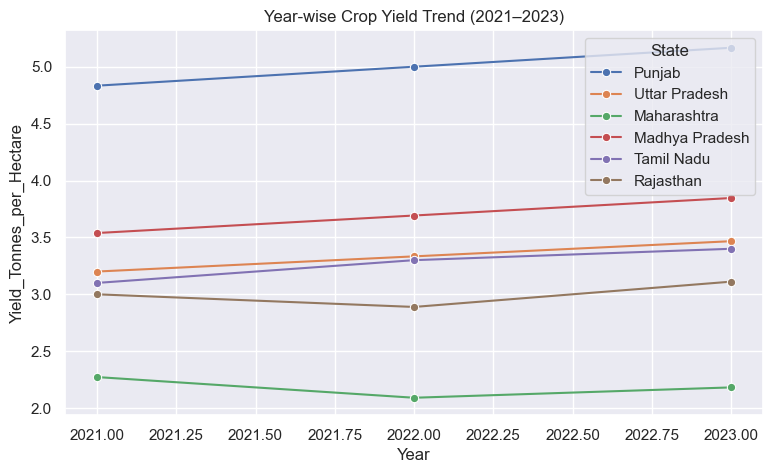

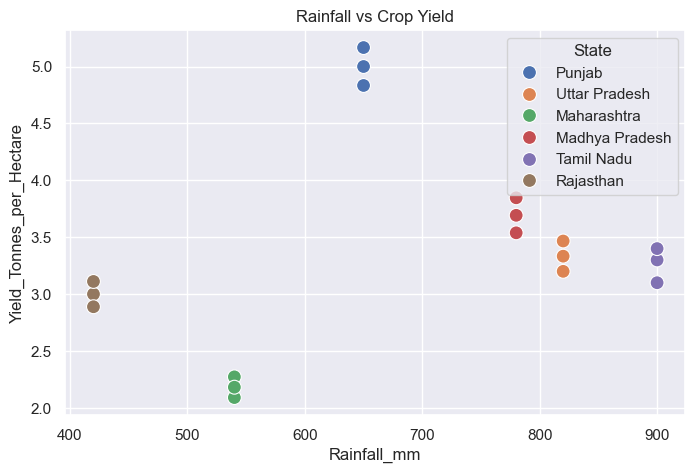

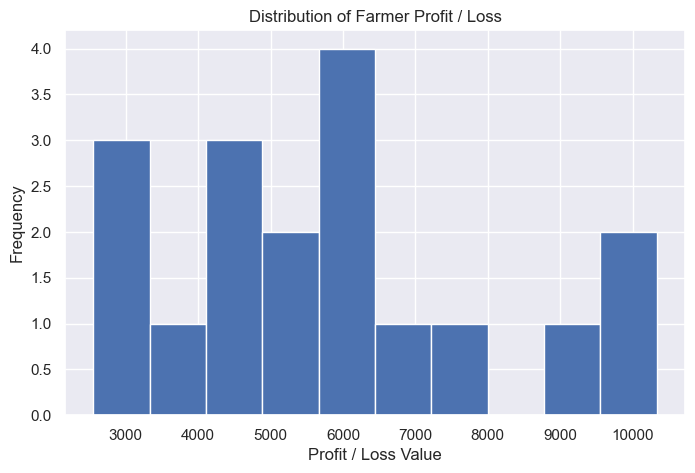

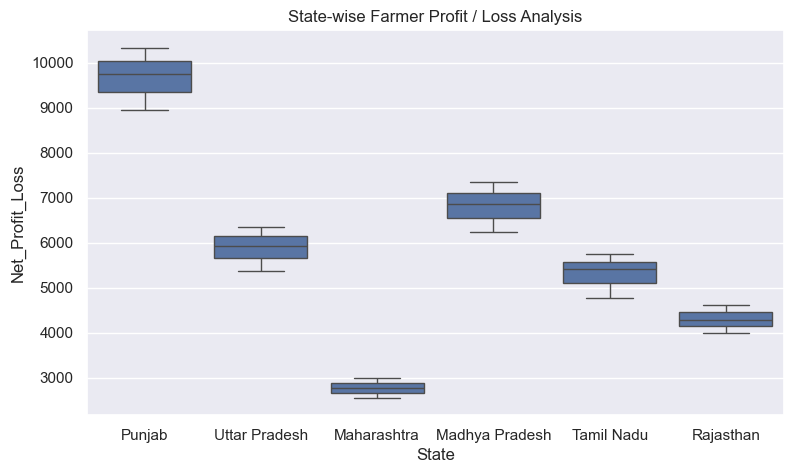

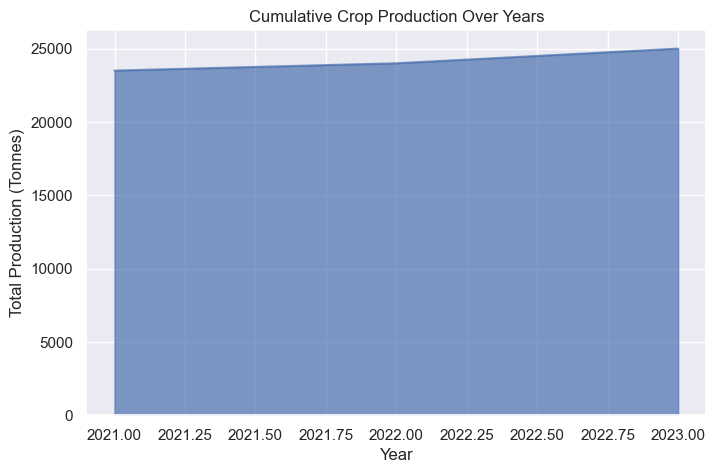

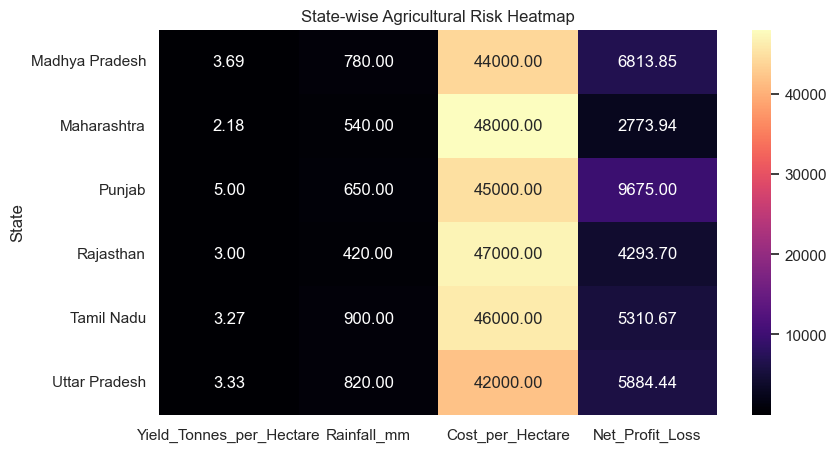

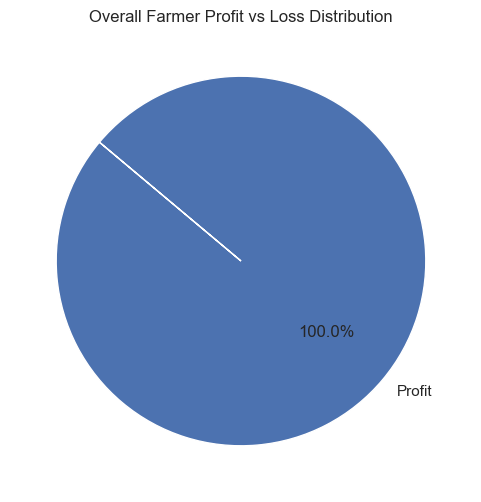


=== STATE-WISE AVERAGE NET PROFIT / LOSS ===

State
Madhya Pradesh    6813.846154
Maharashtra       2773.939394
Punjab            9675.000000
Rajasthan         4293.703704
Tamil Nadu        5310.666667
Uttar Pradesh     5884.444444
Name: Net_Profit_Loss, dtype: float64

=== DATA WITH PROFIT & LOSS COLUMNS ===

            State  Year       Profit  Loss  Result
0          Punjab  2021  8941.666667     0  Profit
1   Uttar Pradesh  2021  5376.000000     0  Profit
2     Maharashtra  2021  3000.000000     0  Profit
3  Madhya Pradesh  2021  6227.692308     0  Profit
4      Tamil Nadu  2021  4774.000000     0  Profit


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
#      DARK THEME
# =============================
plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

# =============================
#          DATASET 
# =============================
data = {
    "State": ["Punjab","Uttar Pradesh","Maharashtra","Madhya Pradesh","Tamil Nadu","Rajasthan"] * 3,
    "Year": [2021]*6 + [2022]*6 + [2023]*6,
    "Crop": ["Wheat","Wheat","Wheat","Wheat","Rice","Wheat"] * 3,
    "Area_Hectare": [1200,1500,1100,1300,1000,900] * 3,
    "Production_Tonnes": [
        5800,4800,2500,4600,3100,2700,
        6000,5000,2300,4800,3300,2600,
        6200,5200,2400,5000,3400,2800
    ],
    "Rainfall_mm": [650,820,540,780,900,420] * 3,
    "Temperature_C": [22,25,28,24,30,26] * 3,
    "Cost_per_Hectare": [45000,42000,48000,44000,46000,47000] * 3,
    "MSP": [2125] * 18,
    "Market_Price": [
        2300,2100,1800,2200,2000,1900,
        2400,2200,1700,2300,2100,1850,
        2450,2250,1750,2350,2150,1950
    ]
}


df = pd.DataFrame(data)


# Yield
df["Yield_Tonnes_per_Hectare"] = df["Production_Tonnes"] / df["Area_Hectare"]

# Net Profit / Loss
df["Net_Profit_Loss"] = (df["Market_Price"] - (df["Cost_per_Hectare"] / 100)) * df["Yield_Tonnes_per_Hectare"]

# Separate Profit & Loss Columns
df["Profit"] = df["Net_Profit_Loss"].apply(lambda x: x if x > 0 else 0)
df["Loss"] = df["Net_Profit_Loss"].apply(lambda x: abs(x) if x < 0 else 0)

# Profit / Loss Label
df["Result"] = df["Net_Profit_Loss"].apply(lambda x: "Profit" if x > 0 else "Loss")

# =============================
#  BAR GRAPH – AVG YIELD
# =============================
plt.figure(figsize=(8,5))
df.groupby("State")["Yield_Tonnes_per_Hectare"].mean().plot(kind="bar")
plt.title("State-wise Average Crop Yield")
plt.ylabel("Tonnes per Hectare")
plt.xlabel("State")
plt.show()

# =============================
#  LINE GRAPH – YIELD TREND
# =============================
plt.figure(figsize=(9,5))
sns.lineplot(data=df, x="Year", y="Yield_Tonnes_per_Hectare", hue="State", marker="o")
plt.title("Year-wise Crop Yield Trend (2021–2023)")
plt.show()

# =============================
#  SCATTER – RAINFALL vs YIELD
# =============================
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Rainfall_mm", y="Yield_Tonnes_per_Hectare", hue="State", s=100)
plt.title("Rainfall vs Crop Yield")
plt.show()

# =============================
#  HISTOGRAM – PROFIT / LOSS
# =============================
plt.figure(figsize=(8,5))
plt.hist(df["Net_Profit_Loss"], bins=10)
plt.title("Distribution of Farmer Profit / Loss")
plt.xlabel("Profit / Loss Value")
plt.ylabel("Frequency")
plt.show()

# =============================
#  BOX PLOT – STATE WISE P/L
# =============================
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="State", y="Net_Profit_Loss")
plt.title("State-wise Farmer Profit / Loss Analysis")
plt.show()

# =============================
#  AREA GRAPH – PRODUCTION
# =============================
plt.figure(figsize=(8,5))
df.groupby("Year")["Production_Tonnes"].sum().plot(kind="area", alpha=0.7)
plt.title("Cumulative Crop Production Over Years")
plt.ylabel("Total Production (Tonnes)")
plt.show()

# =============================
#  HEATMAP – RISK ANALYSIS
# =============================
risk_df = df.groupby("State")[[
    "Yield_Tonnes_per_Hectare",
    "Rainfall_mm",
    "Cost_per_Hectare",
    "Net_Profit_Loss"
]].mean()

plt.figure(figsize=(9,5))
sns.heatmap(risk_df, annot=True, cmap="magma", fmt=".2f")
plt.title("State-wise Agricultural Risk Heatmap")
plt.show()

# =============================
# PIE CHART – PROFIT vs LOSS
# =============================
result_counts = df["Result"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    result_counts,
    labels=result_counts.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Overall Farmer Profit vs Loss Distribution")
plt.show()

# =============================
# FINAL CONSOLE OUTPUT
# =============================
print("\n=== STATE-WISE AVERAGE NET PROFIT / LOSS ===\n")
print(df.groupby("State")["Net_Profit_Loss"].mean())

print("\n=== DATA WITH PROFIT & LOSS COLUMNS ===\n")
print(df[["State","Year","Profit","Loss","Result"]].head())